<h1 align='center'>Construindo bons conjuntos de dados de treinamento - pr√©-processamento de dados</h1>
<p align= 'center'><img src=https://sloboda-studio.com/wp-content/uploads/2020/08/Group-192.jpg></p>
<p align= 'justify'>A qualidade dos dados e a quantidade de informa√ß√µes √∫teis que eles cont√™m s√£o fatores-chave que determinam o qu√£o bem um algoritmo de aprendizado de m√°quina pode aprender. Portanto, √© absolutamente cr√≠tico garantir que examinemos e pr√©-processemos um conjunto de dados antes de aliment√°-lo a um algoritmo de aprendizado.</p>

<h3>Lidando com dados perdidos</h3>
<p align= 'justify'>N√£o √© incomum em aplica√ß√µes do mundo real que nossos exemplos de treinamento estejam faltando um ou mais valores por v√°rios motivos. Pode ter havido um erro no processo de coleta de dados, certas medidas podem n√£o ser aplic√°veis ou campos espec√≠ficos podem ter sido simplesmente deixados em branco em uma pesquisa, por exemplo. Normalmente, vemos valores ausentes como espa√ßos em branco em nossa tabela de dados ou como strings de espa√ßo reservado, como <i>NaN</i>, que significa "n√£o √© um n√∫mero" ou <i>NULL</i> (um indicador comumente usado de valores desconhecidos em bancos de dados relacionais). Infelizmente, a maioria das ferramentas computacionais s√£o incapazes de lidar com esses valores ausentes ou produzir√£o resultados imprevis√≠veis se simplesmente os ignorarmos. Portanto, √© crucial que cuidemos desses valores ausentes antes de prosseguirmos com an√°lises adicionais.</p>

<h3>Identificando valores ausentes em dados tabulares</h3>

In [247]:
import pandas as pd
from io import StringIO

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

<p align='justify'>Para um DataFrame maior, pode ser tedioso procurar manualmente os valores ausentes; neste caso, podemos usar o m√©todo <i>isnull</i> para retornar um DataFrame com valores booleanos que indicam se uma c√©lula cont√©m um valor num√©rico <i>(False)</i> ou se faltam dados <i>(True)</i>. Usando o m√©todo <i>sum</i>, podemos retornar o n√∫mero de valores ausentes por coluna da seguinte forma:</p>

In [248]:
# O somat√≥rio das colunas que possuem dados NaN ou Nulos.
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

<h4>Eliminando exemplos de treinamento ou recursos com valores ausentes</h4>

In [249]:
# Removendo todas as linhas que tem Nan
df.dropna(axis=0)

A    B    C    D
0  1.0  2.0  3.0  4.0

In [250]:
# Removendo todas as colunas que tem Nan
df.dropna(axis=1)

A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0

In [251]:
# Removendo as linhas se TODAS forem NaN.
df.dropna(how='all')

A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

In [252]:
# Removendo as linhas se tiver pelo menos que 4 valores reais.
df.dropna(thresh=4)

A    B    C    D
0  1.0  2.0  3.0  4.0

In [253]:
# Removendo as linhas aonde aparece NaN em uma coluna espec√≠fica, no caso "C".
df.dropna(subset=['C'])

A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN

<p align='justify'>Embora a remo√ß√£o de dados ausentes pare√ßa ser uma abordagem conveniente, ela tamb√©m apresenta algumas desvantagens; por exemplo, podemos acabar removendo muitas amostras, o que impossibilitar√° uma an√°lise confi√°vel. Ou, se removermos muitas colunas de <i>features</i>, corremos o risco de perder informa√ß√µes valiosas que nosso classificador precisaria para discriminar entre as classes. Uma das alternativas mais usadas para lidar com valores ausentes √© chamada de <b>T√©cnica de Interpola√ß√£o</b>.</p>

<h3>Como imputar valores ausentes</h3>
<p align='justify'>Como foi dito anteriomente, excluir as linhas ou colunas pode comprometer dados valiosos, no conjunto como um todo. Como alteranativa, podemos usar diferentes t√©cnicas de interpola√ß√£o para estimar os valores ausentes dos outros exemplos de treinamento em nosso conjunto de dados. Uma das t√©cnicas de interpola√ß√£o mais comuns √© a imputa√ß√£o m√©dia, onde simplesmente substitu√≠mos o valor ausente pelo valor m√©dio de toda a coluna de <i>features</i>. Uma maneira conveniente de conseguir isso √© usando a classe <i>SimpleImputer</i> do <i>scikit-learn</i>, conforme mostrado no c√≥digo a seguir:</p>

In [254]:
# Conjunto de dados
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [255]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean') # Utilizando a M√âDIA. Poder√≠amos utilizar: "median"(Mediana) ou 'most_frequent'(Mais Frequente)

# O "most_frequent" √© usando para colunas categ√≥ricas: cores, sexo, tamanho (P,M,G), entre outras.


imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [256]:
# Alternativamente poder√≠amos usar o Pandas "fillna" para prover o mesmo recurso.

df.fillna(df.mean()) 

A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   7.5  8.0
2  10.0  11.0  12.0  6.0

<h3>Entendendo a API do estimador scikit-learn</h3>
<p align='justify'>Anteriormente, usamos a classe <i>SimpleImputer</i> do <i>scikit-learn</i> para imputar valores ausentes em nosso conjunto de dados. A classe <i>SimpleImputer</i> pertence √†s chamadas classes de transformadores no <i>scikit-learn</i>, que s√£o usadas para transforma√ß√£o de dados. Os dois m√©todos essenciais desses estimadores s√£o o ajuste e a transforma√ß√£o. O m√©todo <i>fit</i> √© usado para aprender os par√¢metros dos dados de treinamento e o m√©todo <i>transform</i> usa esses par√¢metros para transformar os dados. Qualquer matriz de dados a ser transformada precisa ter o mesmo n√∫mero de recursos que a matriz de dados que foi usada para ajustar o modelo.
<p align='center'><img src=https://www.bogotobogo.com/python/scikit-learn/images/scikit-data-processing1-missing-data/fit-transform-scikit-learn-estimator.png></p>


<p align='justify'>Os classificadores que usamos pertencem aos chamados estimadores do <i>scikit-learn</i>, com uma <i>API</i> conceitualmente muito semelhante √† classe do transformador. Os estimadores t√™m um m√©todo de previs√£o, mas tamb√©m podem ter um m√©todo de transforma√ß√£o. Como voc√™ deve se lembrar, tamb√©m usamos o m√©todo de <i>fit</i> para aprender os par√¢metros de um modelo quando treinamos esses estimadores para classifica√ß√£o. No entanto, em tarefas de aprendizado supervisionado, tamb√©m fornecemos os r√≥tulos de classe para ajustar o modelo, que podem ser usados para fazer previs√µes sobre novos exemplos de dados n√£o rotulados por meio do m√©todo de previs√£o, conforme ilustrado na figura a seguir:</p>
<p align='center'><img src=https://www.bogotobogo.com/python/scikit-learn/images/scikit-data-processing1-missing-data/scikit-learn-predict-method.png></p>

<h4>Como lidar com dados categ√≥ricos</h4>
<p align='justify'>At√© agora, trabalhamos apenas com valores num√©ricos. No entanto, n√£o √© incomum que conjuntos de dados do mundo real contenham uma ou mais colunas de recursos categ√≥ricos. Agora, faremos uso de exemplos simples, mas eficazes, para ver como lidar com esse tipo de dados em bibliotecas de computa√ß√£o num√©rica. Quando estamos falando de dados categ√≥ricos, temos que distinguir ainda mais entre caracter√≠sticas <b>ordinais e nominais</b>. Os recursos ordinais podem ser entendidos como valores categ√≥ricos que podem ser classificados ou ordenados. Por exemplo, o tamanho da camiseta seria um recurso ordinal, pois podemos definir uma ordem: XL > L > M. Em contrapartida, os recursos nominais n√£o implicam em nenhuma ordem e, para continuar com o exemplo anterior, poder√≠amos pensar em a cor da camiseta como um recurso nominal, pois normalmente n√£o faz sentido dizer que, por exemplo, o vermelho √© maior que o azul.</p>

In [257]:
# Criando um Conjunto de dados com classes categ√≥ricas

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

color size  price classlabel
0  green    M   10.1     class2
1    red    L   13.5     class1
2   blue   XL   15.3     class2

In [258]:
# Mapeando recursos ordinais
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2

In [259]:
# Se quiser reverter aos valores aprendidos.
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

<h4>Codificando r√≥tulos de classe</h4>
<p align='justify'>Muitas bibliotecas de aprendizado de m√°quina exigem que os r√≥tulos de classe sejam codificados como valores inteiros. Embora a maioria dos estimadores para classifica√ß√£o no <i>scikit-learn</i> converta r√≥tulos de classe em inteiros internamente. Considera-se uma boa pr√°tica fornecer r√≥tulos de classe como matrizes de inteiros para evitar falhas t√©cnicas. Para codificar os r√≥tulos de classe, podemos usar uma abordagem semelhante ao mapeamento de recursos ordinais discutidos anteriormente. Precisamos lembrar que os r√≥tulos de classe n√£o s√£o ordinais e n√£o importa qual n√∫mero inteiro atribu√≠mos a um r√≥tulo de <i>string</i> espec√≠fico. Assim, podemos simplesmente enumerar os r√≥tulos das classes, come√ßando em 0:</p>

In [260]:
import numpy as np

# Crie um dict de mapeamento para converter r√≥tulos de classe de strings para inteiros

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [261]:
# Agora podemos converter os r√≥tulos para converter r√≥tulos de classe strings para inteiros
df['classlabel'] = df['classlabel'].map(class_mapping)
df

color  size  price  classlabel
0  green     1   10.1           1
1    red     2   13.5           0
2   blue     3   15.3           1

In [262]:
# Para reverter

inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2

In [263]:
# Alternativamente, podemos usar o LabelEncoder
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [264]:
# Reverter o mapeamento utilizando o m√©todo inverse_transform
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

<h4>Executando a codifica√ß√£o one-hot em recursos nominais</h4>
<p align='justify'>Como os estimadores do <i>scikit-learn</i> para classifica√ß√£o tratam r√≥tulos de classe como dados categ√≥ricos que n√£o implicam em nenhuma ordem (nominal), usamos o <i>LabelEncoder</i> para codificar os r√≥tulos de <i>string</i> em inteiros.</p>

In [265]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

<p align='justify'>Se pararmos neste ponto e alimentarmos o <i>array</i> em nosso classificador, cometeremos um dos erros mais comuns ao lidar com dados categ√≥ricos. Voc√™ consegue identificar o problema? Embora os valores de cor n√£o venham em nenhuma ordem espec√≠fica, um algoritmo de aprendizado agora assumir√° que verde √© maior que azul e vermelho √© maior que verde. Embora essa suposi√ß√£o esteja incorreta, o algoritmo ainda pode produzir resultados √∫teis. No entanto, esses resultados n√£o seriam ideais.</i>

<p align='justify'>Para lidar com esse tipo de problema, utilizamos a t√©cnica do <i>one-hot encoding</i>. De maneira geral, estaremos transformando cada categoria em novas <i>features</i>(colunas). Ent√£o as cores (azul, verde e vermelho) seriam transformadas em 3 colunas.</p>

In [266]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

<p align='justify'>Observe que aplicamos o <i>OneHotEncoder</i> a apenas uma √∫nica coluna, (X[:, 0].reshape(-1, 1))), para evitar modificar tamb√©m as outras duas colunas na matriz. Se quisermos transformar seletivamente colunas em um array com v√°rios recursos, podemos usar o <i>ColumnTransformer</i>, que aceita uma lista de tuplas (nome, transformador, coluna(s)) da seguinte forma:</p>

In [267]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]), 
                               ('nothing', 'passthrough', [1, 2])]) # Usando o argumento 'passthrough' n√£o acontece nada!!
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [268]:
# Usando o Pandas - get_dummies()
pd.get_dummies(df[['price','color','size']])

price  size  color_blue  color_green  color_red
0   10.1     1           0            1          0
1   13.5     2           0            0          1
2   15.3     3           1            0          0

<p align='justify'>Quando estamos usando conjuntos de dados de codifica√ß√£o one-hot, temos que ter em mente que isso introduz multicolinearidade, o que pode ser um problema para certos m√©todos (por exemplo, m√©todos que exigem invers√£o de matriz). Se os recursos s√£o altamente correlacionados, as matrizes s√£o computacionalmente dif√≠ceis de inverter, o que pode levar a estimativas numericamente inst√°veis. Para reduzir a correla√ß√£o entre as vari√°veis, podemos simplesmente remover uma coluna de recurso do <i>array</i> codificado <i>one-hot</i>. Observe que n√£o perdemos nenhuma informa√ß√£o importante removendo uma coluna de recurso; por exemplo, se removermos a coluna color_blue, as informa√ß√µes do recurso ainda ser√£o preservadas, pois se observarmos color_green=0 e color_red=0, isso implica que a observa√ß√£o deve ser azul.</p>

In [269]:
# Usando o argumento drop_first=True
pd.get_dummies(df[['price','color','size']],
                    drop_first=True)

price  size  color_green  color_red
0   10.1     1            1          0
1   13.5     2            0          1
2   15.3     3            0          0

In [270]:
# No OneHotEncoder utilizando o drop="first" e o categories='auto'

color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

<h4>Como particionar um conjunto de dados em conjuntos de dados de treinamento e teste separados</h4>
<p align='justify'>Lembre-se de que comparar previs√µes com r√≥tulos verdadeiros no conjunto de teste pode ser entendido como a avalia√ß√£o de desempenho imparcial de nosso modelo antes de deix√°-lo solto no mundo real. Vamos preparar um novo conjunto de dados, o conjunto de dados <i>Wine</i>. Depois de pr√©-processarmos o conjunto de dados, exploraremos diferentes t√©cnicas de sele√ß√£o de recursos para reduzir a dimensionalidade de um conjunto de dados.</p>

In [271]:
# Carregando os dados
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels: ', np.unique(df_wine['Class label']))
df_wine.head()

Class labels:  [1 2 3]


Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [272]:
from sklearn.model_selection import train_test_split

# Particionando em conjuntos de treino e teste 
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3,     # Separando 30% para testes
                     random_state=0, 
                     stratify=y)        # Assegura que as classes de treino e teste ter√£o classe proporcionais com base no original.

<h4>Trazendo recursos para a mesma escala</h4>
<p align='justify'>O dimensionamento de recursos √© uma etapa crucial em nosso <i>pipeline</i> de pr√©-processamento que pode ser facilmente esquecido. √Årvores de decis√£o e florestas aleat√≥rias s√£o dois dos poucos algoritmos de aprendizado de m√°quina em que n√£o precisamos nos preocupar com o dimensionamento de recursos. Esses algoritmos s√£o invariantes de escala. No entanto, a maioria dos algoritmos de aprendizado de m√°quina e otimiza√ß√£o se comportam muito melhor se os recursos estiverem na mesma escala, quando implementamos o algoritmo de otimiza√ß√£o de gradiente descendente.<p>
<p align='justify'>A import√¢ncia do dimensionamento de recursos pode ser ilustrada por um exemplo simples. Vamos supor que temos dois recursos em que um recurso √© medido em uma escala de 1 a 10 e o segundo recurso √© medido em uma escala de 1 a 100.000, respectivamente.</p>

<p align='justify'>Agora, existem duas abordagens comuns para trazer diferentes recursos para a mesma escala: <b>normaliza√ß√£o e padroniza√ß√£o</b>. Esses termos s√£o frequentemente usados ‚Äã‚Äãde forma bastante vaga em diferentes campos e o significado deve ser derivado do contexto. Na maioria das vezes, a normaliza√ß√£o refere-se ao redimensionamento dos recursos para um intervalo de [0, 1], que √© um caso especial de dimensionamento m√≠nimo-m√°ximo. Para normalizar nossos dados, podemos simplesmente aplicar a escala <i>min-max</i> a cada coluna de recurso, onde o novo valor, de um exemplo, pode ser calculado da seguinte forma:

In [273]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

<p align='justify'>Embora a normaliza√ß√£o por meio do dimensionamento <i>min-max</i> seja uma t√©cnica comumente usada que √© √∫til quando precisamos de valores em um intervalo limitado, a padroniza√ß√£o pode ser mais pr√°tica para muitos algoritmos de aprendizado de m√°quina, especialmente para algoritmos de otimiza√ß√£o, como gradiente descendente.</p>
<p align='justify'>A raz√£o √© que muitos modelos lineares, como a regress√£o log√≠stica e SVM, inicializam os pesos em 0 ou pequenos valores aleat√≥rios pr√≥ximos a 0. Usando padroniza√ß√£o, centralizamos o recurso colunas em m√©dia 0 com desvio padr√£o 1 para que as colunas de recursos tenham os mesmos par√¢metros de uma distribui√ß√£o normal padr√£o (m√©dia zero e vari√¢ncia unit√°ria), o que facilita o aprendizado dos pesos. Al√©m disso, a padroniza√ß√£o mant√©m informa√ß√µes √∫teis sobre valores discrepantes e torna o algoritmo menos sens√≠vel a eles em contraste com o dimensionamento m√≠nimo-m√°ximo, que dimensiona os dados para um intervalo limitado de valores.</p>

In [274]:
# Implementando a Padroniza√ß√£o
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [275]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('Standardized:', (ex - ex.mean()) / ex.std())

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
print('  Normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

Standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
  Normalized: [0.  0.2 0.4 0.6 0.8 1. ]


<p align='justify'>Novamente, tamb√©m √© importante destacar que ajustamos a classe <i>StandardScaler</i> apenas uma vez ‚Äì nos dados de treinamento ‚Äì e usamos esses par√¢metros para transformar o conjunto de dados de teste ou qualquer novo ponto de dados.</p>
<p align='justify'>Outros m√©todos mais avan√ßados para dimensionamento de recursos est√£o dispon√≠veis no <i>scikit-learn</i>, como o <i>RobustScaler</i>. O <i>RobustScaler</i> √© especialmente √∫til e recomendado se estivermos trabalhando com pequenos conjuntos de dados que cont√™m <b>muitos valores discrepantes</b>. Da mesma forma, se o algoritmo de aprendizado de m√°quina aplicado a esse conjunto de dados for propenso a <i>overfitting</i>, o <i>RobustScaler</i> pode ser uma boa escolha. Operando em cada coluna de recurso independentemente, o <i>RobustScaler</i> remove o valor mediano e dimensiona o conjunto de dados de acordo com o 1¬∫ e o 3¬∫ quartil do conjunto de dados (ou seja, o 25¬∫ e o 75¬∫ quantil, respectivamente) de modo que valores mais extremos e valores discrepantes se tornem menos pronunciados.</p>

<h4>Selecionando recursos significativos</h4>
<p align='justify'>N√≥s j√° comentamos que os modelos que performam melhor no conjunto de treinamento em rela√ß√£o ao conjunto de teste √© um indicador forte de <i>overfitting</i>.<i>Overfitting</i> significa que o modelo ajusta os par√¢metros muito de perto em rela√ß√£o √†s observa√ß√µes particulares no conjunto de dados de treinamento, mas n√£o generaliza bem para novos dados; dizemos que o modelo tem uma <b>alta vari√¢ncia</b>. A raz√£o para o <i>overfitting</i> √© que nosso modelo √© muito complexo para os dados de treinamento fornecidos. As solu√ß√µes comuns para reduzir o erro de generaliza√ß√£o s√£o as seguintes:</p>

<li>Coletar mais dados de treinamento</li>
<li>Introduzir uma penalidade por complexidade via regulariza√ß√£o</li>
<li>Escolher um modelo mais simples com menos par√¢metros</li>
<li>Reduzir a dimensionalidade dos dados</li>

<h5>Regulariza√ß√£o L1 e L2 como penalidades contra a complexidade do modelo</h5>
<p align='justify'>A regulariza√ß√£o <i>L2</i> √© uma abordagem para reduzir a complexidade de um modelo penalizando grandes pesos individuais.Outra abordagem para reduzir a complexidade do modelo √© a regulariza√ß√£o <i>L1</i>. Ao contr√°rio da regulariza√ß√£o <i>L2</i>, a regulariza√ß√£o <i>L1</i> geralmente produz vetores de recursos esparsos e a maioria dos pesos de recursos ser√° zero. A esparsidade pode ser √∫til na pr√°tica se tivermos um conjunto de dados de alta dimens√£o com muitos recursos que s√£o irrelevantes, especialmente nos casos em que temos mais dimens√µes irrelevantes do que exemplos de treinamento. Nesse sentido, a regulariza√ß√£o <i>L1</i> pode ser entendida como uma t√©cnica de sele√ß√£o de atributos.</p>


In [276]:
# Para modelos regularizados no scikit-learn que suportam regulariza√ß√£o L1, 
# podemos simplesmente definir o par√¢metro de penalidade como 'l1' para obter uma solu√ß√£o esparsa

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',
                     C=1.0,                    # C=1.0 √© o padr√£o. Se aumentar ou diminuir torna o efeito da regulariza√ß√£o mais forte o fraco. 
                      solver='liblinear',      # lbfgs n√£o suporta regulariza√ß√£o L1
                       multi_class='ovr') 

lr.fit(X_train_std,y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [277]:
# Vemos que nosso modelo fez uma acur√°cia perfeita no treinamento e teste.
# O intercept_ corresponde ao w0
lr.intercept_

array([-1.26390989, -1.2158165 , -2.37027808])

<p align='justify'>Como ajustamos o objeto <i>LogisticRegression</i> em um conjunto de dados multiclasse por meio da abordagem <i>one-vs-rest (OvR)</i>, a primeira intercepta√ß√£o pertence ao modelo que se ajusta √† classe 1 versus as classes 2 e 3, o segundo valor √© a intercepta√ß√£o do modelo que se encaixa na classe 2 versus as classes 1 e 3, e o terceiro valor √© a intercepta√ß√£o do modelo que se encaixa na classe 3 versus as classes 1 e 2:</p>

In [278]:
# O .coef_ corresponde ao wj para j>0
lr.coef_

array([[ 1.2462364 ,  0.18057504,  0.74594836, -1.16399031,  0.        ,
         0.        ,  1.16107952,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55700243,  2.50876295],
       [-1.53716483, -0.38734101, -0.99518108,  0.36508262, -0.0597712 ,
         0.        ,  0.66791128,  0.        ,  0.        , -1.93405994,
         1.23330738,  0.        , -2.2312404 ],
       [ 0.13582509,  0.16839098,  0.35728913,  0.        ,  0.        ,
         0.        , -2.43796373,  0.        ,  0.        ,  1.56359518,
        -0.81900634, -0.49228444,  0.        ]])

<p align='justify'>Como resultado da regulariza√ß√£o <i>L1</i>, que, como mencionado, serve como m√©todo de sele√ß√£o de atributos, treinamos um modelo robusto para os atributos potencialmente irrelevantes neste conjunto de dados.</p>
<p align='justify'>Os vetores de peso do exemplo anterior n√£o s√£o necessariamente esparsos porque cont√™m mais entradas diferentes de zero do que zero, <u>isso √© importante observar</u>. No entanto, poder√≠amos impor a esparsidade (mais entradas zero) aumentando ainda mais a for√ßa da regulariza√ß√£o, ou seja, escolhendo valores mais baixos para o par√¢metro <i>C</i>.</p>
<p align='justify'>No √∫ltimo exemplo de regulariza√ß√£o, vari√°mos a intensidade da regulariza√ß√£o e tra√ßamos o caminho da regulariza√ß√£o - os coeficientes de peso dos diferentes recursos para diferentes intensidades de regulariza√ß√£o:</p>

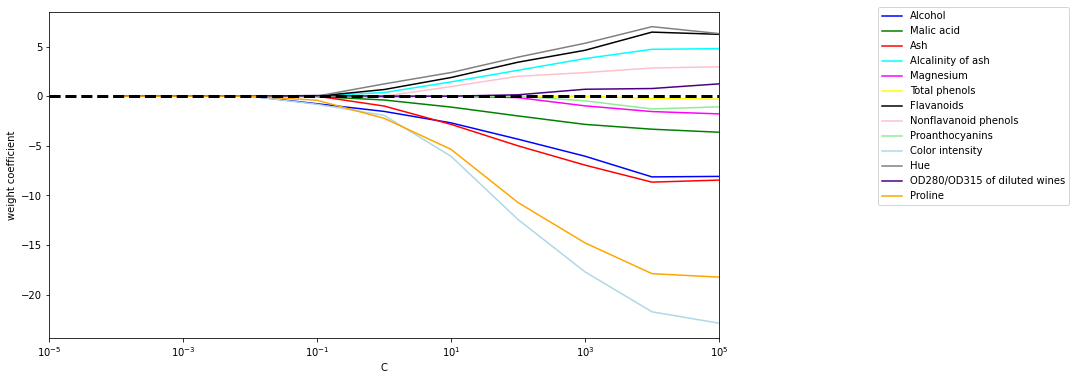

In [279]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)


for column, color in zip(range(weights.shape[1]), colors):
    
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

<p align='justify'>O gr√°fico resultante nos fornece mais informa√ß√µes sobre o comportamento da regulariza√ß√£o <i>L1</i>. Como podemos ver, todos os pesos dos recursos ser√£o zero se penalizarmos o modelo com um par√¢metro de regulariza√ß√£o forte (<i>C</i> < 0,01); <i>C</i> √© o inverso do par√¢metro de regulariza√ß√£o (ùúÜ).</p>

<h4>Algoritmos de sele√ß√£o de recursos sequenciais</h4>
<p align='justify'>Uma forma alternativa de reduzir a complexidade do modelo e evitar o <i>overfitting</i> √© a redu√ß√£o da dimensionalidade por meio da sele√ß√£o de recursos, o que √© especialmente √∫til para modelos n√£o regularizados. Existem duas categorias principais de t√©cnicas de redu√ß√£o de dimensionalidade: sele√ß√£o de recursos e extra√ß√£o de recursos. Por meio da sele√ß√£o de recursos, selecionamos um subconjunto dos recursos originais, enquanto na extra√ß√£o de recursos, derivamos informa√ß√µes do conjunto de recursos para construir um novo subespa√ßo de recursos.</p>

<p align='justify'>Veremos uma fam√≠lia cl√°ssica de algoritmos de sele√ß√£o de recursos. A motiva√ß√£o por tr√°s dos algoritmos de sele√ß√£o de recursos √© selecionar automaticamente um subconjunto de recursos que s√£o mais relevantes para o problema, melhorar a efici√™ncia computacional ou reduzir o erro de generaliza√ß√£o do modelo removendo recursos ou ru√≠dos irrelevantes, o que pode ser √∫til para algoritmos que n√£o suportam a regulariza√ß√£o.</p>
<p align='justify'>Um algoritmo cl√°ssico de sele√ß√£o sequencial de atributos √© a sele√ß√£o sequencial para tr√°s (<i>SBS</i>), que visa reduzir a dimensionalidade do subespa√ßo inicial de atributos com um decaimento m√≠nimo no desempenho do classificador para melhorar a efici√™ncia computacional. Em certos casos, o <i>SBS</i> pode at√© melhorar o poder preditivo do modelo se um modelo sofrer de <i>overfitting</i>.</p>

<h5>Algoritmos de pesquisa <i>Greedy</i> (Ganaciosos)</h5>
<q align='justify'>Algoritmos <i>Greedy</i> (Ganaciosos) fazem escolhas localmente √≥timas em cada est√°gio de um problema de busca combinat√≥ria e geralmente produzem uma solu√ß√£o sub√≥tima para o problema, em contraste com algoritmos de busca exaustivos, que avaliam todas as combina√ß√µes poss√≠veis e garantem encontrar a solu√ß√£o √≥tima. No entanto, na pr√°tica, uma busca exaustiva √© muitas vezes <u>computacionalmente invi√°vel</u>, enquanto algoritmos <i>greedy</i> permitem uma solu√ß√£o menos complexa e computacionalmente mais eficiente.</q>

<p align='justify'>A ideia por tr√°s do algoritmo <i>SBS</i> √© bastante simples: o <i>SBS</i> remove sequencialmente os recursos do subconjunto de recursos completo at√© que o novo subespa√ßo de recursos contenha o n√∫mero desejado de recursos. Para determinar qual caracter√≠stica deve ser removida em cada est√°gio, precisamos definir a fun√ß√£o crit√©rio, <i>J</i>, que queremos minimizar.</p>

<p align='justify'>O crit√©rio calculado pela fun√ß√£o crit√©rio pode ser simplesmente a diferen√ßa de desempenho do classificador antes e depois da remo√ß√£o de um determinado recurso. Ent√£o, o recurso a ser removido em cada est√°gio pode ser simplesmente definido como o recurso que maximiza esse crit√©rio; ou em termos mais simples, em cada est√°gio, eliminamos o recurso que causa a menor perda de desempenho ap√≥s a remo√ß√£o. SIMPLES N√ÉO √â??</p>

<p align='justify'>Infelizmente, o algoritmo <i>SBS</i> ainda n√£o foi implementado no <i>scikit-learn</i>, por√©m ela se encontra implementada na biblioteca <i>mlxtend</i>.</p>

In [280]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sbs = sbs.fit(X_train_std, y_train)

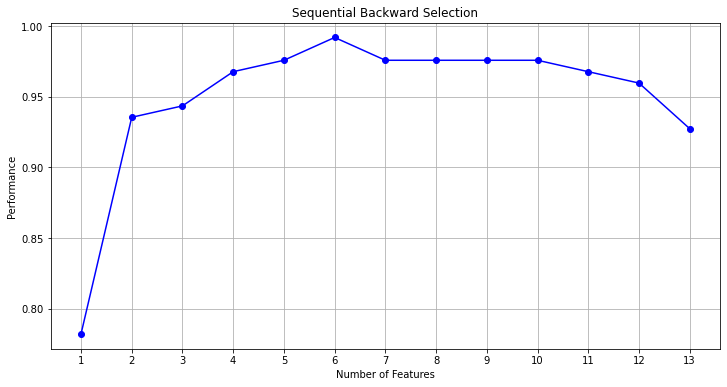

In [281]:
# Plotando os dados
fig1 = plot_sfs(sbs.get_metric_dict(), kind=None, figsize=(12,6))
plt.title('Sequential Backward Selection')
plt.grid()
plt.show()

<p align='justify'>Como podemos ver na figura, a precis√£o do classificador KNN melhorou no conjunto de dados de valida√ß√£o √† medida que reduzimos o n√∫mero de recursos, o que provavelmente se deve a uma diminui√ß√£o na maldi√ß√£o da dimensionalidade. Al√©m disso, podemos ver no gr√°fico a seguir que o classificador alcan√ßou quase 100% de precis√£o para <b>k={6}</b>.Para satisfazer nossa curiosidade, vamos ver como √© o menor subconjunto de recursos (k=6), que rendeu um desempenho t√£o bom no conjunto de dados de valida√ß√£o:</p>

In [282]:
table = pd.DataFrame.from_dict(sbs.get_metric_dict(confidence_interval=0.90)).T
table = pd.DataFrame(table.loc[6]).T
table

feature_idx                           cv_scores avg_score  \
6  (0, 2, 3, 6, 9, 12)  [1.0, 0.967741935483871, 1.0, 1.0]  0.991935   

         feature_names  ci_bound   std_dev   std_err  
6  (0, 2, 3, 6, 9, 12)  0.017192  0.013968  0.008065

In [283]:
# Comparar a Acur√°cia no conjunto original
knn.fit(X_train_std,y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:    ', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy:     0.9629629629629629


In [284]:
k6 = [0,2,3,6,9,12] # Separando as colunas que tiveram melhor desempenho

knn.fit(X_train_std[:, k6], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k6], y_train))
print('Test accuracy:    ', knn.score(X_test_std[:, k6], y_test))

Training accuracy: 0.9919354838709677
Test accuracy:     0.9629629629629629


<p align='justify'>Pelo visto n√£o tivemos grandes altera√ß√µes de m√©tricas em ambos conjuntos. Uma coisa que temos que ter em mente √© que conjuntos pequenos de dados, tais como <i>Wine, Iris</i>, entre outros, s√£o suscet√≠veis √† aleatoriedade. Por outro lado, vemos que conseguimos alcan√ßar o mesmo resultado com apenas metade do conjunto (6 colunas apenas!). Isso, computacionalmente falando, j√° √© uma grande vit√≥ria. Al√©m disso, ao reduzir o n√∫mero de caracter√≠sticas, obtivemos um modelo mais simples e mais f√°cil de interpretar.</p>

<h4>Avaliando a import√¢ncia do recurso com florestas aleat√≥rias</h4>

<p align='justify'>Aprendemos como usar a regulariza√ß√£o <i>L1</i> para zerar recursos irrelevantes por meio de regress√£o log√≠stica e como usar o algoritmo <i>SBS</i> para sele√ß√£o de recursos e aplic√°-lo a um algoritmo <i>KNN</i>. Outra abordagem √∫til para selecionar recursos relevantes de um conjunto de dados √© usar uma floresta aleat√≥ria, uma t√©cnica de classifica√ß√£o usando o <i>scikit-learn</i>. Usando uma floresta aleat√≥ria, podemos medir a import√¢ncia do recurso como a diminui√ß√£o m√©dia da impureza calculada a partir de todas as √°rvores de decis√£o na floresta, sem fazer suposi√ß√µes sobre se nossos dados s√£o linearmente separ√°veis ‚Äã‚Äãou n√£o.</p>
<p align='justify'>A implementa√ß√£o de floresta aleat√≥ria no <i>scikit-learn</i> j√° coleta os valores de import√¢ncia do recurso para que possamos acess√°-los atrav√©s do atributo <i>feature_importances_</i> ap√≥s ajustar um <i>RandomForestClassifier</i>. Vamos treinar uma floresta de 500 √°rvores no conjunto de dados <i>Wine</i> e classificar os 13 recursos por suas respectivas medidas de import√¢ncia - lembre-se de que os n√≥s n√£o precisam usar recursos padronizados ou normalizados em modelos baseados em √°rvore:</p>

In [285]:
np.argsort(forest.feature_importances_)[::-1]

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2], dtype=int64)

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


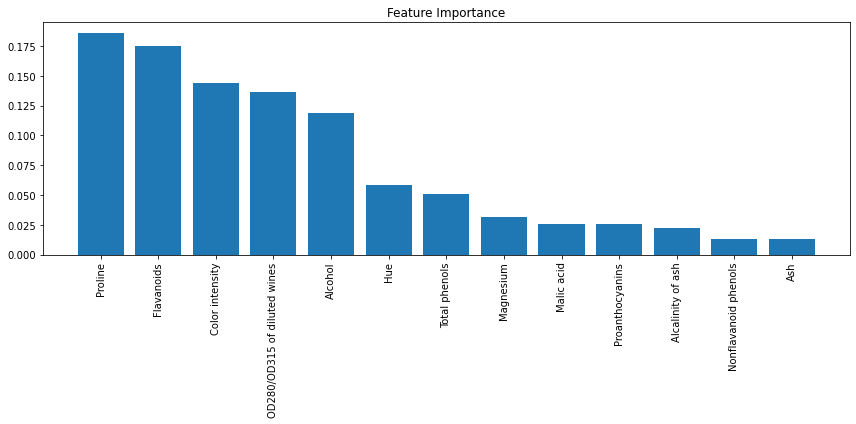

In [286]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, # 500 √°rvores
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.figure(figsize=(12,6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

<p align='justify'>Depois de executar o c√≥digo, criamos um gr√°fico que classifica os diferentes recursos no conjunto de dados do<i>Wine</i> por sua import√¢ncia relativa. Observe que os valores de import√¢ncia do recurso s√£o normalizados de forma a somar 1.0.</p>

<p align='justify'>Podemos concluir que os n√≠veis de prolina e flavon√≥ides, a intensidade da cor, a difra√ß√£o OD280/OD315 e a concentra√ß√£o de √°lcool do vinho s√£o as caracter√≠sticas mais discriminativas no conjunto de dados com base na diminui√ß√£o m√©dia de impureza nas 500 √°rvores de decis√£o.</p>
<p align='justify'>S√≥ para constar, 4 dos 6 recursos mais bem classificados no gr√°fico tamb√©m est√£o na sele√ß√£o de subconjunto de 6 recursos do algoritmo SBS que implementamos anteriomente (Alcohol, Flavanoids, Color intensity, Proline).</p>

In [287]:
# Caracter√≠sticas mais 
features = str(table.feature_idx.values).replace('[(','').replace(')]','').split(',')
features = [int(x) for x in features]
for x in features:
    print(feat_labels[x])

Alcohol
Ash
Alcalinity of ash
Flavanoids
Color intensity
Proline


<p align='justify'>No entanto, no que diz respeito √† interpretabilidade, a t√©cnica de floresta aleat√≥ria vem com uma "pegadinha" importante que vale a pena mencionar. Se dois ou mais recursos s√£o altamente correlacionados, um recurso pode ter uma classifica√ß√£o muito alta, enquanto as informa√ß√µes sobre o(s) outro(s) recurso(s) podem n√£o ser totalmente capturadas. Por outro lado, n√£o precisamos nos preocupar com esse problema se estivermos apenas interessados ‚Äã‚Äãno desempenho preditivo de um modelo, em vez da interpreta√ß√£o dos valores de import√¢ncia das caracter√≠sticas.</p>
<p align='justify'>Para concluir esta se√ß√£o sobre valores de import√¢ncia de recursos e florestas aleat√≥rias, vale a pena mencionar que o <i>scikit-learn</i> tamb√©m implementa um objeto <i>SelectFromModel</i> que seleciona recursos com base em um limite especificado (<i>threshold</i>) pelo usu√°rio ap√≥s o ajuste do modelo, que √© √∫til se quisermos usar o <i>RandomForestClassifier</i> como um seletor de recursos e uma etapa intermedi√°ria em um objeto <i>Pipeline</i> do <i>scikit-learn</i>, que nos permite conectar a diferentes etapas de pr√©-processamento com um estimador. Por exemplo, poder√≠amos definir o limite como 0,1 para reduzir o conjunto de dados aos cinco recursos mais importantes usando o seguinte c√≥digo:</p>

In [288]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('N√∫mero de caracter√≠sticas que atendem a esse crit√©rio de limite:', 
      X_selected.shape[1])

N√∫mero de caracter√≠sticas que atendem a esse crit√©rio de limite: 5


In [289]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
